In [89]:
import pandas as pd
import numpy as np
import pickle
import json
import pyspark as sc
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow.python.platform import gfile
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

# make plot outputs appear and be stored within this notebook
%matplotlib inline 

# Set figure visual attributes
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.5)

# Set figure size 
rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [90]:
# Set Column Header Labels
columns = ['time stamp', 'module', 'pwr', 'stationid', 'freq']

# Create pandas dataframe 'df' by reading in csv file or txt file in this case
df = pd.read_csv('rf_data.txt', header = None, names = columns)

# this converts the module, pwr, and freq columns to ints and floats
df[['module', 'pwr', 'freq']] = df[['module', 'pwr', 'freq']].apply(pd.to_numeric)

# Remove missing values
df = df.dropna()

In [91]:
# output table of first fize values
df.head()

,time stamp,module,pwr,stationid,freq
0,"April 28th 2018, 17:48:16.498",9,-21.464,range_core,908420000.0
1,"April 28th 2018, 17:48:16.474",9,-15.087,range_outer2,908420000.0
2,"April 28th 2018, 17:48:16.395",9,-18.211,range_outer1,908420000.0
3,"April 28th 2018, 17:39:40.341",9,-14.709,range_core,908420000.0
4,"April 28th 2018, 17:39:40.059",9,-23.279,range_outer2,908420000.0


In [92]:
# output summary of data in file
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145808 entries, 0 to 145807
Data columns (total 5 columns):
time stamp    145808 non-null object
module        145808 non-null int64
pwr           145808 non-null float64
stationid     145808 non-null object
freq          145808 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.7+ MB


In [93]:
# output a descriptivetable of the numerical attributes of our dataset
df.describe()

,module,pwr,freq
count,145808.000000,145808.000000,1.458080e+05
mean,3.295196,-41.844822,2.087255e+09
std,2.904645,11.836496,5.991242e+08
min,1.000000,-102.366000,4.695500e+08
25%,1.000000,-45.991000,1.915000e+09
50%,1.000000,-41.209000,2.432000e+09
75%,6.000000,-35.921000,2.452000e+09
max,9.000000,-5.102000,2.495000e+09


In [94]:
# statistics about the modle attribute
df["module"].value_counts()

1    87001
6    45266
9    13541
Name: module, dtype: int64

In [95]:
# randomly split dataset into 80% training and 20% testing
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = RANDOM_SEED)

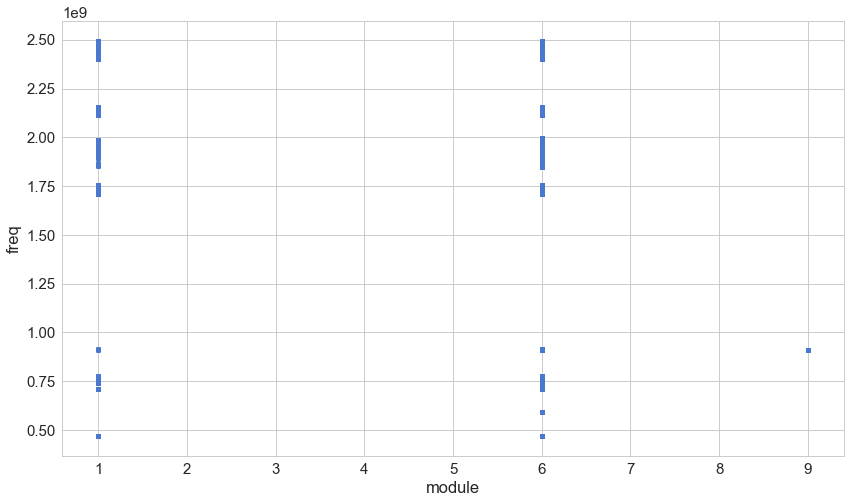

In [96]:
# copy training set and print scatter plot of module vs. freq
df = train_set.copy()
df.plot(kind = "scatter", x = "module", y = "freq")

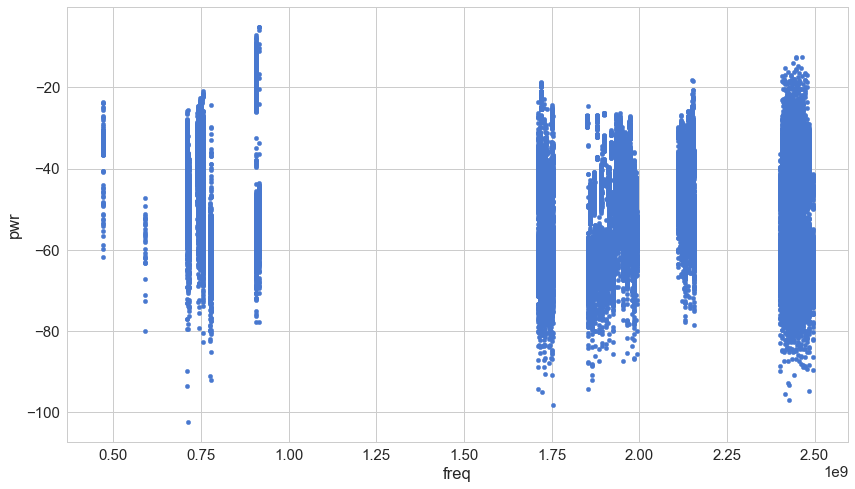

In [97]:
# print scatter plot of freq vs. pwr
df.plot(kind = "scatter", x = "freq", y = "pwr")

In [98]:
# See how each attribute correlates to the module
# Correlation ranges from -1 to 1. The closer to 1
# the stronger the correlation
corr_matrix = df.corr()
corr_matrix["module"].sort_values(ascending=False)

module    1.000000
pwr      -0.006666
freq     -0.752704
Name: module, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002532ED1FA90>,
      dtype=object)

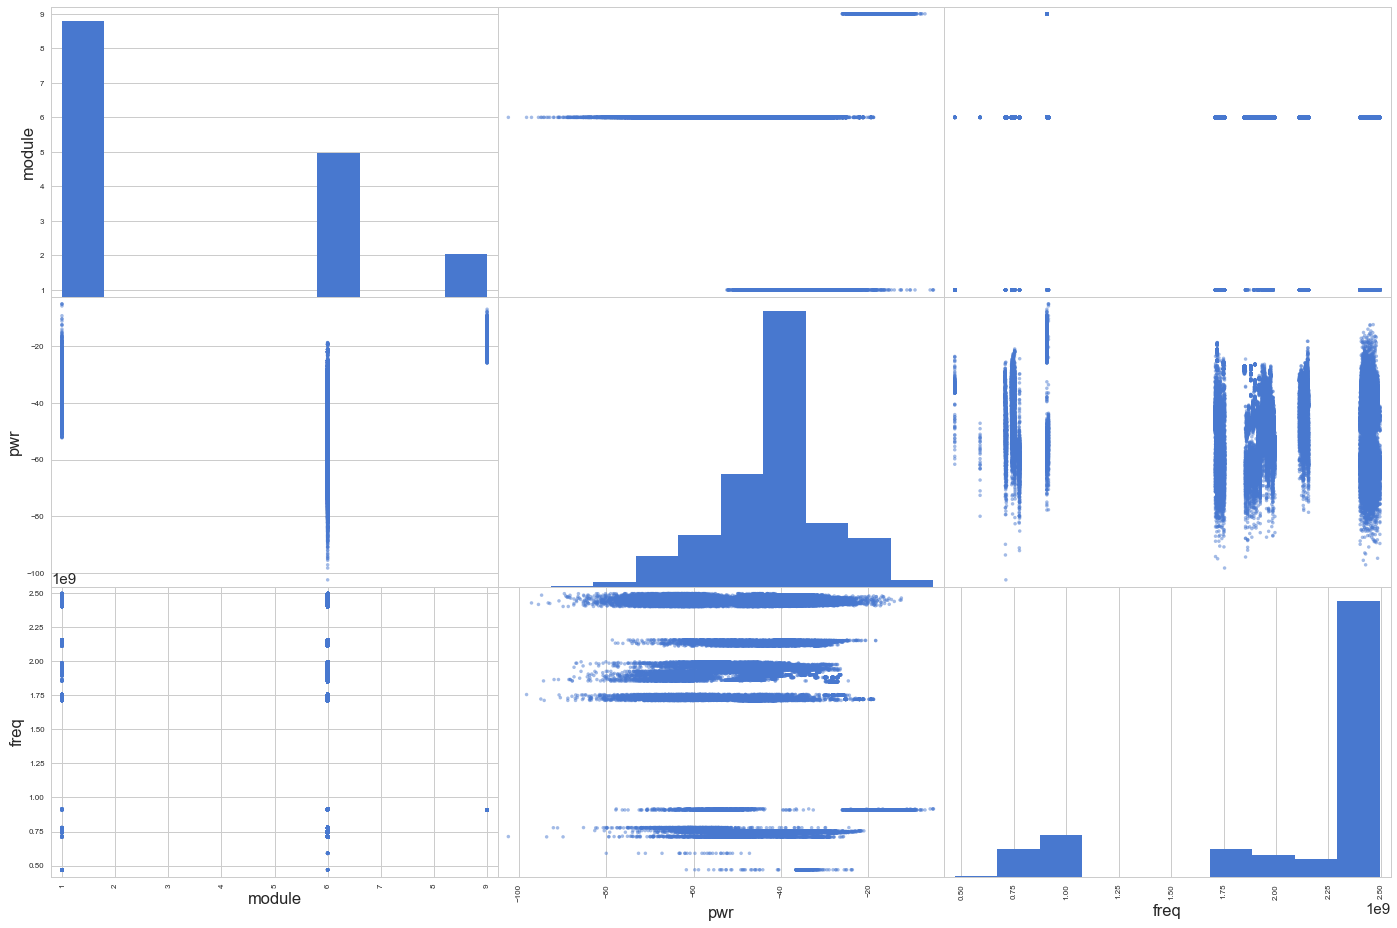

In [102]:
attributes = ["module", "pwr", "freq"]
scatter_matrix(df[attributes], figsize = (24, 16))